In [370]:
import pandas as pd
import numpy as np

In [371]:
import pandas as pd
import numpy as np
existing_data=pd.read_csv("dataset.csv")
additional_rows = 10000 - 2880

# Creating new rows by sampling from the existing data
new_data = existing_data.sample(n=additional_rows, replace=True)

# Concatenating the existing data with the new data
data = pd.concat([existing_data, new_data], ignore_index=True)

In [372]:
data

,CROP_TYPE,SOIL_TYPE,REGION,Humidity,soilmiosture,Temperature,WEATHER_CONDITION,WATER_REQUIREMENT
0,BANANA,DRY,DESERT,82.002744,377,29.10,NORMAL,8.750
1,BANANA,DRY,DESERT,80.319644,379,29.08,SUNNY,10.250
2,BANANA,DRY,DESERT,82.320763,376,29.06,WINDY,9.650
3,BANANA,DRY,DESERT,80.158363,377,29.05,RAINY,0.750
4,BANANA,DRY,DESERT,81.604873,379,29.03,NORMAL,9.850
...,...,...,...,...,...,...,...,...
9995,ONION,WET,SEMI ARID,80.300256,216,28.53,RAINY,5.125
9996,COTTON,WET,HUMID,63.831799,166,28.31,WINDY,5.100
9997,BEAN,HUMID,HUMID,15.154059,171,28.18,NORMAL,3.700
9998,RICE,WET,SEMI HUMID,65.614188,311,30.45,WINDY,8.500


In [373]:
print(data["CROP_TYPE"].unique())
print(data["SOIL_TYPE"].unique())
print(data["REGION"].unique())
print(data["WEATHER_CONDITION"].unique())

['BANANA' 'SOYABEAN' 'CABBAGE' 'POTATO' 'RICE' 'MELON' 'MAIZE' 'CITRUS'
 'BEAN' 'WHEAT' 'MUSTARD' 'COTTON' 'SUGARCANE' 'TOMATO' 'ONION']
['DRY' 'HUMID' 'WET']
['DESERT' 'SEMI ARID' 'SEMI HUMID' 'HUMID']
['NORMAL' 'SUNNY' 'WINDY' 'RAINY']


In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CROP_TYPE          10000 non-null  object 
 1   SOIL_TYPE          10000 non-null  object 
 2   REGION             10000 non-null  object 
 3   Humidity           10000 non-null  float64
 4   soilmiosture       10000 non-null  int64  
 5   Temperature        10000 non-null  float64
 6   WEATHER_CONDITION  10000 non-null  object 
 7   WATER_REQUIREMENT  10000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


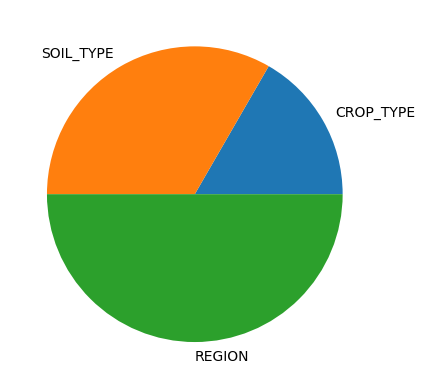

In [375]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset
cars = ['CROP_TYPE','SOIL_TYPE','REGION']

share=[10,20,30]


plt.pie(x = share,labels = cars)

# show plot
plt.show()


In [376]:
data.isna().sum()

CROP_TYPE            0
SOIL_TYPE            0
REGION               0
Humidity             0
soilmiosture         0
Temperature          0
WEATHER_CONDITION    0
WATER_REQUIREMENT    0
dtype: int64

In [377]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


In [378]:

X = data.drop('WATER_REQUIREMENT', axis=1)  # Features
y = data['WATER_REQUIREMENT']  # Target variable


In [379]:
var = data[["CROP_TYPE","SOIL_TYPE","REGION","WEATHER_CONDITION"]]
var

,CROP_TYPE,SOIL_TYPE,REGION,WEATHER_CONDITION
0,BANANA,DRY,DESERT,NORMAL
1,BANANA,DRY,DESERT,SUNNY
2,BANANA,DRY,DESERT,WINDY
3,BANANA,DRY,DESERT,RAINY
4,BANANA,DRY,DESERT,NORMAL
...,...,...,...,...
9995,ONION,WET,SEMI ARID,RAINY
9996,COTTON,WET,HUMID,WINDY
9997,BEAN,HUMID,HUMID,NORMAL
9998,RICE,WET,SEMI HUMID,WINDY


In [380]:

encoder = OneHotEncoder(sparse=False)
# Fit the encoder to your data
encoder.fit(var)
x_encoded = encoder.transform(var)

x_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [381]:
# Inverse transform the one-hot encoded data to the original categorical feature
original_categories = encoder.inverse_transform(x_encoded)
original_categories

array([['BANANA', 'DRY', 'DESERT', 'NORMAL'],
       ['BANANA', 'DRY', 'DESERT', 'SUNNY'],
       ['BANANA', 'DRY', 'DESERT', 'WINDY'],
       ...,
       ['BEAN', 'HUMID', 'HUMID', 'NORMAL'],
       ['RICE', 'WET', 'SEMI HUMID', 'WINDY'],
       ['MAIZE', 'WET', 'SEMI HUMID', 'RAINY']], dtype=object)

In [382]:
encoded_df = pd.DataFrame(x_encoded)

In [383]:
encoded_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [384]:
new_column_names = {old_col: str(int(old_col) + 1) for old_col in encoded_df.columns[0:25]}
encoded_df = encoded_df.rename(columns=new_column_names)

In [385]:
encoded_df

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,25
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [386]:
current_column_names = encoded_df.columns.tolist()

# Specify the index (position) of the column name you want to change
column_index_to_change = 25 # Index starts from 0, so 2 corresponds to the third column

# Modify the column name at the specified index
current_column_names[column_index_to_change] = "26"

# Update DataFrame with new column names
encoded_df.columns = current_column_names

# current_column_names = encoded_df.columns.tolist()

# # Specify the index (position) of the column name you want to change
# column_index_to_change = 26 # Index starts from 0, so 2 corresponds to the third column

# # Modify the column name at the specified index
# current_column_names[column_index_to_change] = "Humidity"

# # Update DataFrame with new column names
# encoded_df.columns = current_column_names

In [387]:
encoded_df

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [388]:
df1 = pd.concat([encoded_df,data[["Humidity","soilmiosture","Temperature"]]],axis=1)

In [389]:
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,Humidity,soilmiosture,Temperature
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,82.002744,377,29.10
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.319644,379,29.08
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.320763,376,29.06
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.158363,377,29.05
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,81.604873,379,29.03


In [390]:
# new_column_names = {old_col: str(int(old_col) + 1) for old_col in df1.columns[0:25]}
# df1 = df1.rename(columns=new_column_names)

In [391]:
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,Humidity,soilmiosture,Temperature
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,82.002744,377,29.10
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.319644,379,29.08
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.320763,376,29.06
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.158363,377,29.05
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,81.604873,379,29.03


In [392]:
# current_column_names = df1.columns.tolist()

# # Specify the index (position) of the column name you want to change
# column_index_to_change = 25 # Index starts from 0, so 2 corresponds to the third column

# # Modify the column name at the specified index
# current_column_names[column_index_to_change] = "26"

# # Update DataFrame with new column names
# df1.columns = current_column_names

In [393]:
# current_column_names = df1.columns.tolist()

# # Specify the index (position) of the column name you want to change
# column_index_to_change = 26 # Index starts from 0, so 2 corresponds to the third column

# # Modify the column name at the specified index
# current_column_names[column_index_to_change] = "Humidity"

# # Update DataFrame with new column names
# df1.columns = current_column_names

In [394]:
# df1 = df1.rename(columns={'25': '26'})
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,Humidity,soilmiosture,Temperature
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,82.002744,377,29.10
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.319644,379,29.08
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,82.320763,376,29.06
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.158363,377,29.05
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,81.604873,379,29.03


In [395]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)

In [396]:
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor

# X_poly_train = RandomForestRegressor.fit(X_train,y_train)
# model = RandomForestRegressor(n_estimators=20,random_state=20)
# model.fit(X_train, y_train)
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [397]:
pred = model.predict(X_test)

In [398]:
from sklearn.metrics import r2_score,mean_squared_error

In [399]:

print(mean_squared_error(y_test,pred))

0.8346036792953397


In [400]:
print(r2_score(y_test,pred))
#randomforest---r2score_0.9233892774678888,error_1.0978320235012462
#xgboost---r2score_0.980857353636336,error_0.2743142147469165

0.997775865569388


In [401]:
print(data["CROP_TYPE"].unique())
print(data["SOIL_TYPE"].unique())
print(data["REGION"].unique())
print(data["WEATHER_CONDITION"].unique())

['BANANA' 'SOYABEAN' 'CABBAGE' 'POTATO' 'RICE' 'MELON' 'MAIZE' 'CITRUS'
 'BEAN' 'WHEAT' 'MUSTARD' 'COTTON' 'SUGARCANE' 'TOMATO' 'ONION']
['DRY' 'HUMID' 'WET']
['DESERT' 'SEMI ARID' 'SEMI HUMID' 'HUMID']
['NORMAL' 'SUNNY' 'WINDY' 'RAINY']


In [402]:

x=pd.DataFrame({
    'CROP_TYPE':["SOYABEAN"],"SOIL_TYPE":["HUMID"],"REGION":["DESERT"],"WEATHER_CONDITION":["SUNNY"]
})

In [403]:
x_encoded = encoder.transform(x)
x_encoded

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [404]:
temp = 25
humid = 39
moist = 10
arr2 = np.array([[temp,humid,moist]])

In [405]:
arr = np.append(encoded_df,arr2)


In [406]:
# model.predict([arr])

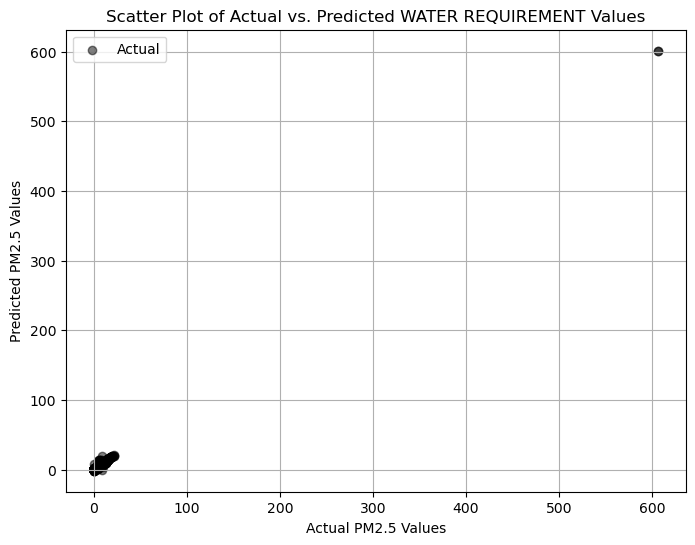

In [407]:
import matplotlib.pyplot as plt
# Scatter plot with different colors for y_test and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='black', label='Actual', alpha=0.5)
#plt.scatter(y_test, pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel("Actual PM2.5 Values")
plt.ylabel("Predicted PM2.5 Values")
plt.title("Scatter Plot of Actual vs. Predicted WATER REQUIREMENT Values")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
x = data["WATER_REQUIREMENT"]
y = data["Temperature"]
plt.scatter(x,y)